In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 2660281137408809392, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 11006887537001188520
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 6564560939908503473
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14640891840
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 7599836679375759604
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [ ]:
!pip install tensorflow==2.1.0


^C


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import tensorflow as tf
print(tf.version)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.6/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.en.vec #/content/drive/My Drive/AISIA/data/

--2020-07-30 14:07:06--  https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.en.vec
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.74.142, 172.67.9.4, 104.22.75.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.74.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6597238061 (6.1G) [binary/octet-stream]
Saving to: ‘wiki.en.vec’

wiki.en.vec         100%[===================>]   6.14G  11.5MB/s    in 9m 15s  

2020-07-30 14:16:22 (11.3 MB/s) - ‘wiki.en.vec’ saved [6597238061/6597238061]



#LIBRARY

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
# Keras
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LSTM, Conv1D, GlobalMaxPooling1D, Dropout, Activation, GRU, Bidirectional, MaxPooling1D
from tensorflow.keras.layers import Embedding
# NLTK
import nltk
from nltk.corpus import stopwords
from itertools import product
# Other
import numpy as np
import pandas as pd
import pickle
import re
import string
import math
import pandas as pd
from keras.utils import plot_model

#LOAD DATA AND PROCESSING

In [ ]:
stop = ["a", "about", "above", "above", "across", "after", "afterwards", "again", "against", "all", "almost", "alone", "along", "already", "also","although","always","am","among", "amongst", "amoungst", "amount",  "an", "and", "another", "any","anyhow","anyone","anything","anyway", "anywhere", "are", "around", "as",  "at", "back","be","became", "because","become","becomes", "becoming", "been", "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", "both", "bottom","but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", "eleven","else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", "interest", "into", "is", "isnt", "it", "its", "itself", "keep", "keeps", "kept", "last", "latter", "latterly", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly", "move", "much", "must", "my", "myself", "name", "names", "named", "namely", "neither", "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "ok", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own","part", "per", "perhaps", "please", "put", "puts", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "sees", "serious", "several", "she", "should", "show", "shows", "showed", "side", "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thickv", "thin", "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too", "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z"]

In [ ]:
# Pre-processing function
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 
from nltk.stem import PorterStemmer
st = PorterStemmer()

# Pre-processing function
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 

def preprocess_abstract(text):
    text = re.sub("[-]+", " ", text)
    text=text.lower()
    text = re.sub("\d+", "", text)
    text = re.sub("[^\w]", " ", text)

    filtered_sentence = [] 
    for w in text.split(" "): 
        if w not in stop: 
            filtered_sentence.append(w)
    return " ".join(filtered_sentence)
    # return text
    
def preprocess_keywords(text):
    if type(text)==str:
        text=text.lower()
        text = re.sub("\d+", "", text)
        text = re.sub("[^\w]", " ", text)
        text=" ".join(text.split())
    return text



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
field = ["Key"]

# Preprocessing for train
df_train=pd.read_csv('https://raw.githubusercontent.com/huynhthanh98/Winter-School-2020/main/re_data.csv', encoding = "ISO-8859-1")
df_train = df_train.iloc[df_train[field].dropna().index, :]
df_train["Abstract1"] = df_train["Abstract"].map(preprocess_abstract)
df_train["Title1"] = df_train["Title"].map(preprocess_abstract)
df_train["Key1"] = df_train["Key"].map(preprocess_keywords)
    

# Preprocessing for test data
df_test=pd.read_csv('https://raw.githubusercontent.com/huynhthanh98/Winter-School-2020/main/re_data_test.csv', encoding = "ISO-8859-1")
df_test = df_test.iloc[df_test[field].dropna().index, :]
df_test["Abstract"] = df_test["Abstract"].map(preprocess_abstract)
df_test["Title"] = df_test["Title"].map(preprocess_abstract)
df_test["Key"] = df_test["Key"].map(preprocess_keywords)

In [ ]:
df_test

,ID,Title,Abstract,KeyWord,ConferenceID,Key,category,abbr
0,3,covert ephemeral communication data networking,recent years growing belief current ip based ...,NaN,60,security and privacy network security,ACM Conference on Computer and Communications ...,CCS
1,6,automated protocol reverse engineering using s...,network security products nids application fi...,NaN,60,networks network protocols software and its en...,ACM Conference on Computer and Communications ...,CCS
2,9,otit secure provenance modeling location proofs,personal mobile devices location based service...,NaN,60,security and privacy,ACM Conference on Computer and Communications ...,CCS
3,12,privacy outsourced means clustering,attractive organization outsource data analyti...,NaN,60,information systems data management systems da...,ACM Conference on Computer and Communications ...,CCS
4,15,differential privacy neighbourhood spatial...,differential privacy provides strong guarantee...,NaN,60,information systems information systems applic...,ACM Conference on Computer and Communications ...,CCS
...,...,...,...,...,...,...,...,...
4660,14385,linear fitted iteration multiple reward functions,present general detailed development algorithm...,NaN,37,reinforcement learning dynamic programming dec...,Journal of Machine Learning Research,JMLR
4661,14388,sparse unique nonnegative matrix factorization...,nonnegative matrix factorization nmf popular...,NaN,37,nonnegative matrix factorization data preproce...,Journal of Machine Learning Research,JMLR
4662,14391,fast approximation matrix coherence statistica...,statistical leverage scores matrix squar...,NaN,37,matrix coherence statistical leverage randomiz...,Journal of Machine Learning Research,JMLR
4663,14394,regularized bundle methods convex non convex r...,machine learning cast optimization problem id...,NaN,37,optimization non convex non smooth cutting pla...,Journal of Machine Learning Research,JMLR


Chạy lại từng feature thì từ bước này

In [ ]:
df_train["content"] = df_train["Abstract"] + " " + df_train["Key"]  + " " + df_train["Title"]
df_test["content"] = df_test["Abstract"] + " " + df_test["Key"] + " " + df_test["Title"]
#chọn features cần dùng
#df_train["content"] = df_train["Title"]
#df_test["content"] = df_test["Title"]

In [ ]:
vocabulary_size = 50000
tokenizer = Tokenizer(num_words=vocabulary_size)
tokenizer.fit_on_texts(df_train["content"])
# Tokenize
sequences = tokenizer.texts_to_sequences(df_train["content"])
data = pad_sequences(sequences)

sequences = tokenizer.texts_to_sequences(df_test["content"])
data_test = pad_sequences(sequences, maxlen=len(data[0]))

# saving
with open('tokenizer_Feature.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
labels1 = {label:index for 
index, label in enumerate(df_train.loc[:, "category"].unique())}
y_train1 = [labels1[value] for index, value in df_train.loc[:, 'category'].iteritems()]
y_test1 = [labels1[value] for index, value in df_test.loc[:, 'category'].iteritems()]

In [ ]:
onehot_encoder = OneHotEncoder(sparse=False)

train_y = np.array(y_train1)
train_y = onehot_encoder.fit_transform(train_y.reshape(len(train_y), 1))

test_y = np.array(y_test1)
test_y = onehot_encoder.transform(test_y.reshape(len(test_y), 1))

#Glove embedding

In [ ]:
!pip install Pydrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':"1FrRTxsrtkX_NUcXSM23MATHBByEstYcg"})   
downloaded.GetContentFile('glove')        

In [ ]:
import numpy as np
import codecs
from tqdm.notebook import tqdm

embeddings_index = dict()
f = codecs.open('glove', encoding='utf-8')
for line in tqdm(f):
    values = line.rstrip().rsplit(' ')
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
print('Loaded %s word vectors.' % len(embeddings_index))


Loaded 400000 word vectors.


In [ ]:
embeddings_index["terribly"]

array([-1.0177e-01, -9.6991e-03, -2.4060e-01,  2.7557e-01, -1.8083e-01,
        2.4574e-01,  1.2661e-01, -3.0773e-01,  1.9943e-02,  2.1485e-01,
        5.5262e-02, -4.9741e-02, -1.4222e-01, -1.8231e-01,  1.1499e-01,
       -2.0756e-01, -7.5181e-02,  2.7774e-02, -9.8849e-02,  3.6808e-01,
       -7.1266e-02,  2.3991e-01, -3.2634e-01, -3.3675e-01, -7.9666e-02,
       -1.4925e-01,  1.6497e-01,  2.5201e-01,  4.8785e-02,  1.6555e-01,
       -3.8431e-01,  2.8114e-01, -1.4547e-01,  2.8101e-01,  7.6443e-02,
       -1.3921e-01, -3.8150e-01, -1.4577e-01,  1.0340e-01, -1.1460e-01,
       -2.5587e-01,  2.7008e-01, -1.2234e-01, -2.0886e-01,  7.4508e-02,
        2.2793e-01,  2.4561e-01, -2.4557e-02,  4.4447e-02, -1.4796e-01,
       -1.9941e-01, -2.9757e-01,  2.9341e-01, -2.9035e-01,  6.1889e-02,
        1.6995e-01, -5.0833e-02,  8.2540e-02, -2.0620e-01,  4.7175e-01,
       -3.5888e-01, -1.6530e-01,  1.0924e-01, -9.0328e-02,  1.1462e-01,
       -2.8727e-01,  2.6604e-01,  5.2378e-02,  3.1493e-01, -8.98

In [ ]:
print('preparing embedding matrix...')
words_not_found = []
embedding_matrix = np.zeros((50000, 300))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if (embedding_vector is not None) and len(embedding_vector)!=0:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
    else:
        words_not_found.append(word)
print('number of null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))

preparing embedding matrix...
number of null word embeddings: 26161


#Train

In [ ]:
def train_keras(model_glove):
    mc = keras.callbacks.ModelCheckpoint(filepath="model_glove_{}.h5".format("_".join(field)), 
                                        monitor='val_accuracy',
                                        mode='max', 
                                        verbose=1, 
                                        save_best_only=True)
    history = model_glove.fit(np.array(data), np.array(train_y),
                        batch_size=896,
                        epochs=40,
                        validation_data=(np.array(data_test),
                                         np.array(test_y)),
                        callbacks=[mc]) 

    X_test=data_test
    y_test=np.array(test_y)
    ## Load lại model tốt nhất đã lưu
    print("best model: ")
    model_glove.load_weights("model_glove_{}.h5".format("_".join(field)))

def accuracy_measure(model_glove):
    y_preds = model_glove.predict(data_test)
    y_tests = np.array(y_test1)
    y_preds = np.array(y_preds)
    for i in [1,3,5,10]:
        y_pred = np.argsort(y_preds, axis=1)[:,-i:]
        a=0
        for j,t in enumerate(y_tests):
            if t in y_pred[j]:
                a=a+1
        print(a/len(y_tests))


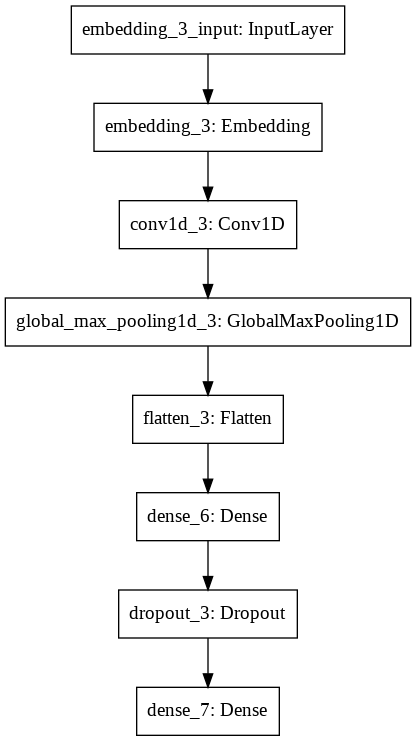

In [ ]:
keras.utils.plot_model(model_glove)

In [ ]:
import functools
top3_acc = functools.partial(keras.metrics.top_k_categorical_accuracy,
                             k=3)
top3_acc.__name__ = "top3"
top5_acc = functools.partial(keras.metrics.top_k_categorical_accuracy,
                             k=5)
top5_acc.__name__ = "top5"
top10_acc = functools.partial(keras.metrics.top_k_categorical_accuracy,
                              k=10)
top10_acc.__name__ = "top10"

import time
for a, b, c in product([1800],[2], [1000]):
    t=time.time()
    model_glove = Sequential()
    model_glove.add(Embedding(vocabulary_size, 300, 
                              input_length=len(data[0]), 
                              weights=[embedding_matrix], 
                              trainable=False))
    model_glove.add(Conv1D(a, b, activation='relu'))
    #model_glove.add(Bidirectional(LSTM(200)))
    model_glove.add(GlobalMaxPooling1D())
    model_glove.add(Flatten())
    model_glove.add(Dense(c, activation='relu'))
    model_glove.add(Dropout(0.2))
#metrics=['accuracy',top3_acc,top5_acc,top10_acc])
    # Dac
    model_glove.add(Dense(66, activation='softmax'))
    # optimizer = keras.optimizers.Adam(learning_rate=0.0005)
    model_glove.compile(loss='categorical_crossentropy', 
                        optimizer="Adam", 
                        metrics=["accuracy",top3_acc,top5_acc,top10_acc])
                        
    model_glove.summary()
    train_keras(model_glove)
    
    


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 592, 300)          15000000  
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 591, 1800)         1081800   
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 1800)              0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1800)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1000)              1801000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 66)               

KeyboardInterrupt: ignored